# **Dialysis-Data-Mining**

# **EDA Tasks**

Which states in the US are most Efficient in terms of hospital dialysis case treatment and discharge?
1. To answer this, For dialysis procedure, which state was most “efficient”?


*   For this you would need to explore and implicate two or more variables towards “Efficiency” - which means doing the most given the least resources and producing minimal wastage.
*   Based on the given list of Variables, Can you develop a list of variables that implicate this and justify a “sound argument” ?





In [15]:
# A single state can't be definitively labeled as the "most efficient" without a detailed, multifaceted analysis of the data.
# Efficiency in dialysis care is a complex concept that requires considering a range of factors, as outlined in the provided variables.
# To make a sound argument, one must define efficiency as achieving the best possible patient outcomes while minimizing resource use and adverse events.
# This requires exploring multiple variables that serve as positive and negative indicators of performance.

#Variables that Justify Efficiency

#To build a sound argument for efficiency, you would analyze a combination of variables from the dataset.
# These variables can be categorized as either positive or negative indicators.

# Positive Indicators (Higher is Better): These metrics show a facility is doing well.
# Five Star Rating: A higher rating indicates better overall quality of care.
# Patient Survival Category Text: A rating of "Better than Expected" suggests superior patient outcomes.
# Kt/V Data (HD/PD): A higher value signifies more effective dialysis, indicating the treatment is more efficient at waste removal.
# Percentage of Prevalent Patients Waitlisted: A higher percentage on a transplant waitlist suggests the facility is successfully preparing patients for a more permanent solution than dialysis

# Negative Indicators (Lower is Better): These metrics show a facility is minimizing adverse events and resource waste.

# Mortality Rate (Facility): A lower rate is a direct measure of better patient outcomes.
# Hospitalization Rate (Facility): A lower rate suggests better patient management and fewer complications, reducing the need for costly acute care.
# Readmission Rate (Facility): A lower rate of hospital readmissions indicates effective post-discharge care, preventing repeat visits and resource strain.
# Standard Infection Ratio (SIR): A lower ratio means the facility has a lower rate of infections, a critical sign of a safe and efficient environment.
# Transfusion Rate (Facility): A lower rate suggests better management of patient anemia, which is a common complication.
# Long-Term Catheter Usage: A lower percentage of patients using catheters is a positive sign, as they are associated with a higher risk of complications.


2. Fill out the template below -

*   My Approach to Defining "Efficiency" for Dialysis Centres -
Define efficiency as a composite measure reflecting positive patient outcomes and lower risk of adverse events. Based on these variables - find all those variables whose higher efficiency score indicates better performance. The score will be calculated based on the aggregate of following metrics:

*   Positive Indicators (Higher is Better):
*   Negative Indicators (Lower is Better):




In [16]:
# My approach to defining "efficiency" for dialysis centers is to create a composite measure that reflects positive patient outcomes and a lower risk of adverse events.

 Positive Indicators (Higher is Better)
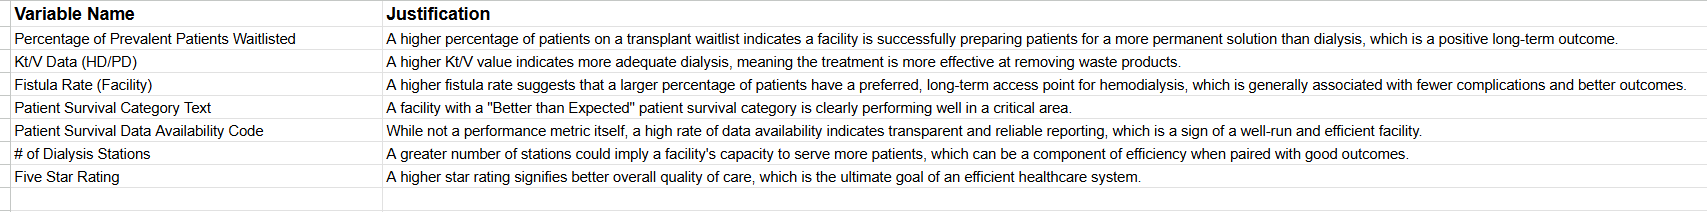

Negative Indicators (Lower is Better)
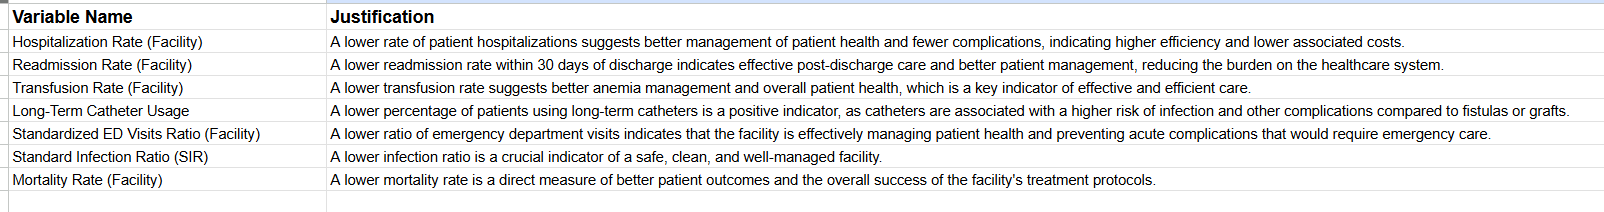

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('dialysis_facility.csv')

3. Data Cleaning and Preprocessing - Then, clean the data by checking for missing values, duplicates, and any necessary transformations.

In [19]:
# This step involves preparing the dataset for analysis. It typically includes:

# Handling Missing Values: Decide whether to impute missing data, drop rows or columns with too much missing data, or keep them as is, depending on the variable and the amount of missingness.
# Checking for Duplicates: Identify and remove any duplicate entries to ensure the analysis is based on unique records.
# Data Type Transformations: Convert variables to their correct data types (e.g., converting 'Five Star' from text to a numerical rating).



In [20]:
# --- 3. Data Cleaning and Preprocessing ---

# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# --- 1. Identify and Report Missing Values ---
# This step helps you understand which columns have missing data and how much.
print("\nNumber of missing values per column (before imputation):")
print(df.isnull().sum())

# Convert relevant columns to a numeric data type, coercing errors to NaN
cols_to_convert = [
    'Mortality Rate (Facility)',
    'Mortality Rate: Lower Confidence Limit (2.5%)',
    'Mortality Rate: Upper Confidence Limit (97.5%)',
    '# Of Dialysis Stations',
    'Transfusion Rate (Facility)',
    'Five Star'
]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


# --- 2. Handle Missing Values Using Recommended Imputation Methods ---

# Method A: Impute Continuous Variables with the Median
# The median is a robust measure that isn't affected by outliers.
# It's a good choice for continuous data.
df['Mortality Rate (Facility)'] = df['Mortality Rate (Facility)'].fillna(df['Mortality Rate (Facility)'].median())
df['Transfusion Rate (Facility)'] = df['Transfusion Rate (Facility)'].fillna(df['Transfusion Rate (Facility)'].median())
df['# Of Dialysis Stations'] = df['# Of Dialysis Stations'].fillna(df['# Of Dialysis Stations'].median())

# Method B: Impute Categorical/Ordinal Variables with the Mode
# The mode is the most frequent value, which works well for non-numeric data.
df['Five Star'] = df['Five Star'].fillna(df['Five Star'].mode()[0])
df['Profit or Non-Profit'] = df['Profit or Non-Profit'].fillna(df['Profit or Non-Profit'].mode()[0])


# --- 3. Verify that Missing Values have been Handled ---
# Re-checking the null values to confirm that the imputation was successful.
print("\nNumber of missing values per column (after imputation):")
print(df.isnull().sum())

# Display a summary of the cleaned data
print("\nCleaned Data Info:")
df.info()

# Save the cleaned data to a new CSV file
df.to_csv('cleaned_dialysis_data_imputed.csv', index=False)

Number of duplicate rows: 0

Number of missing values per column (before imputation):
# Of Dialysis Stations                                 0
95% C.I. (lower limit) for PPPW                      264
95% C.I. (lower limit) for SWR                      3435
95% C.I. (upper limit) for PPPW                      264
95% C.I. (upper limit) for SWR                      3435
                                                    ... 
Transfusion Rate: Lower Confidence Limit (2.5%)     2547
Transfusion Rate: Upper Confidence Limit (97.5%)    2547
YEARS Modality Switch BASED UPON                       0
ZIP Code                                               0
nPCR Data Availability Code                            0
Length: 142, dtype: int64

Number of missing values per column (after imputation):
# Of Dialysis Stations                                 0
95% C.I. (lower limit) for PPPW                      264
95% C.I. (lower limit) for SWR                      3435
95% C.I. (upper limit) for PPPW  

4. Descriptive Statistics - Begin by calculating basic statistics for continuous variables (.describe() method).

In [21]:
df = pd.read_csv('cleaned_dialysis_data_imputed.csv')

In [22]:
# Once the data is clean, you should calculate basic descriptive statistics for the continuous variables using a method like

#.describe() in Python. This will give you an initial overview of the data, including:

# Count: The number of non-missing values.
# Mean: The average value.
# Standard Deviation: The spread of the data.
# Min and Max: The minimum and maximum values.
# Quartiles (25%, 50%, 75%): The distribution of the data.

In [23]:
# --- 4. Descriptive Statistics ---
# Calculate descriptive statistics for the key variables after cleaning and imputation.
print("\nDescriptive statistics for key variables:")
print(df[cols_to_convert].describe())


Descriptive statistics for key variables:
       Mortality Rate (Facility)  \
count                7580.000000   
mean                   22.158997   
std                     5.584219   
min                     0.000000   
25%                    18.600000   
50%                    21.700000   
75%                    25.300000   
max                    66.700000   

       Mortality Rate: Lower Confidence Limit (2.5%)  \
count                                    7235.000000   
mean                                       13.576006   
std                                         4.386293   
min                                         0.000000   
25%                                        10.700000   
50%                                        13.500000   
75%                                        16.400000   
max                                        47.300000   

       Mortality Rate: Upper Confidence Limit (97.5%)  # Of Dialysis Stations  \
count                                     7235

# **Viualization Tasks**

In [24]:
# Visualizations are key to EDA. They help you find hidden patterns and relationships in the data.

# Mortality Rate vs. Dialysis Stations: Use a scatter plot to visualize the relationship between the number of dialysis stations and the mortality rate.
#                                       This can help determine if larger facilities have different mortality outcomes. *
# Box Plot of Mortality Rates by Facility Type: A box plot is ideal for comparing the distribution of mortality rates between different facility types (e.g., "Profit" vs. "Non-profit").
#                                               This can reveal if there is a significant difference in outcomes based on the facility's ownership model.
# Mortality Rate Confidence Interval Visualization: Plot the mortality rate for each facility, including its upper and lower confidence limits.
#                                                   This helps visualize the precision of the mortality rate estimate.
# Comparative Analysis of Transfusion Rates: Compare the transfusion rates across different states.
#                                            A bar chart or a box plot for each state would be effective for this purpose.

5. Visualize the Mortality Rate vs. Dialysis Stations

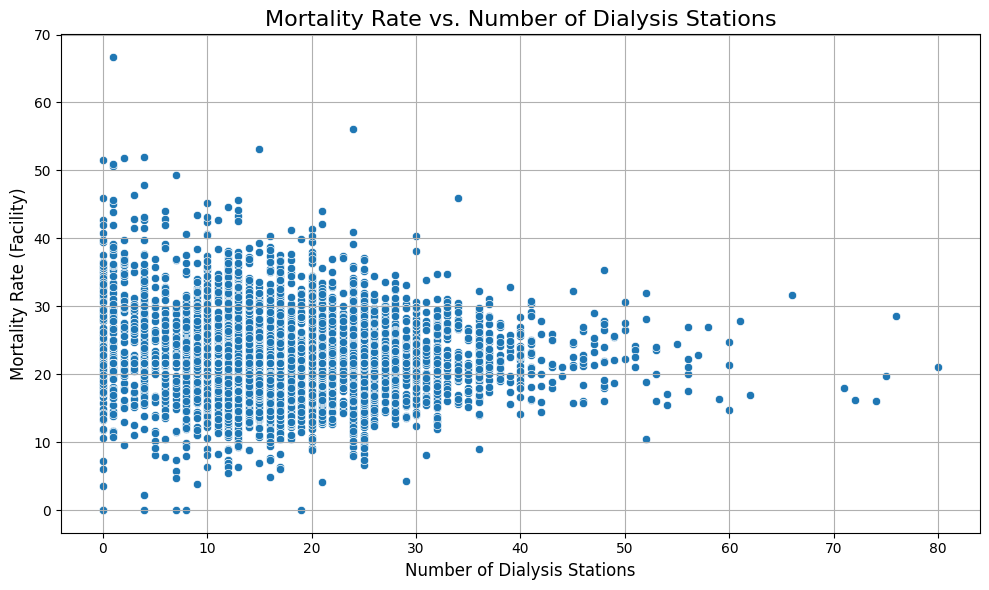

In [25]:
# --- 5. Visualization: Scatter Plot of Mortality Rate vs. Dialysis Stations ---
# This plot helps to visualize if a relationship exists between the number of dialysis stations and the mortality rate.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='# Of Dialysis Stations', y='Mortality Rate (Facility)', data=df)
plt.title('Mortality Rate vs. Number of Dialysis Stations', fontsize=16)
plt.xlabel('Number of Dialysis Stations', fontsize=12)
plt.ylabel('Mortality Rate (Facility)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

6. Box Plot of Mortality Rates by Facility Type

C:\Users\karti\AppData\Local\Temp\ipykernel_16000\854203897.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Profit or Non-Profit', y='Mortality Rate (Facility)', data=df, palette=['#1f77b4', '#ff7f0e'])


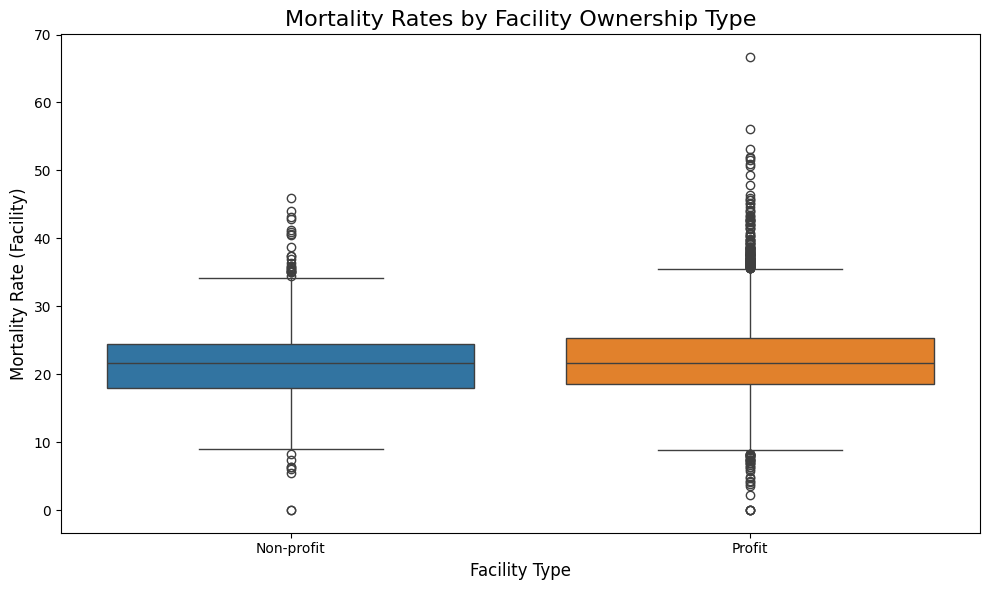

In [26]:
# --- 6. Visualization: Box Plot of Mortality Rates by Facility Type ---
# This plot compares the distribution of mortality rates between profit and non-profit facilities.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Profit or Non-Profit', y='Mortality Rate (Facility)', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Mortality Rates by Facility Ownership Type', fontsize=16)
plt.xlabel('Facility Type', fontsize=12)
plt.ylabel('Mortality Rate (Facility)', fontsize=12)
plt.tight_layout()
plt.show()

7. Mortality Rate Confidence Interval Visualization

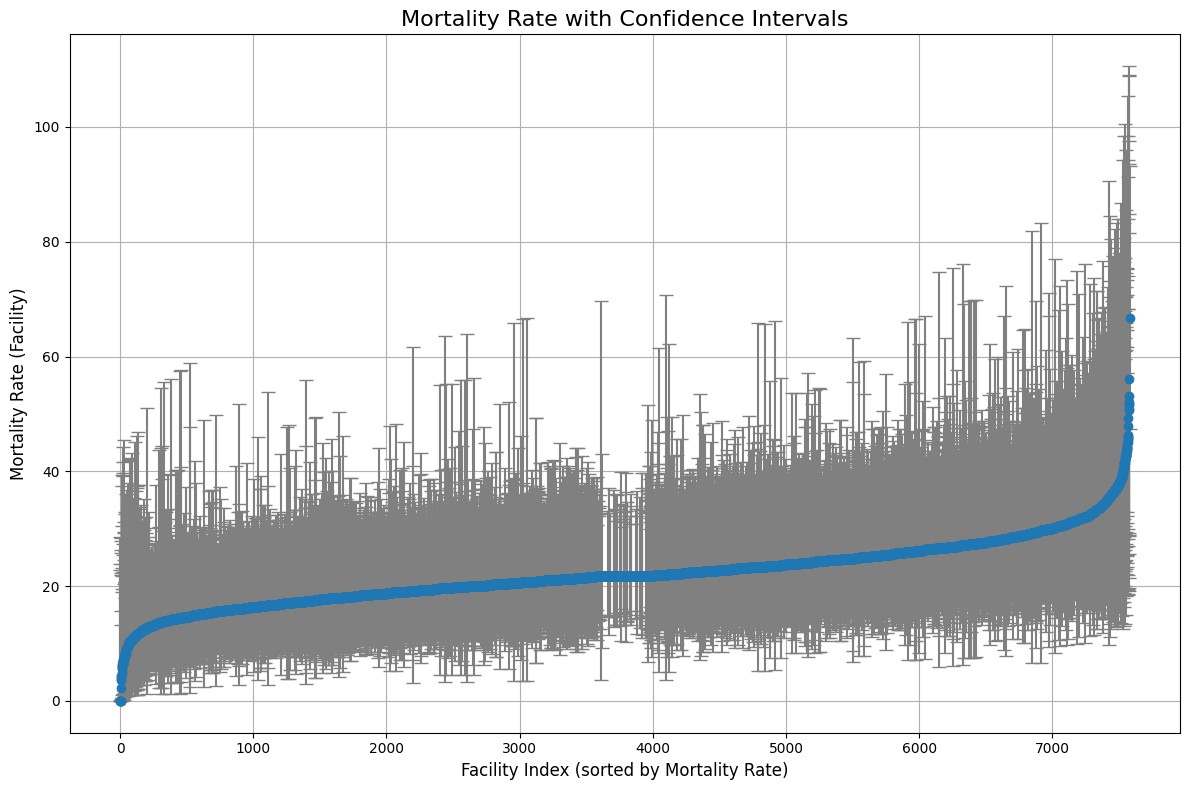

In [27]:
# --- 7. Visualization: Mortality Rate Confidence Interval Visualization ---
# This plot shows the mortality rate for each facility along with its 95% confidence interval, illustrating the precision of the rate.
# Sort by mortality rate for a cleaner visualization
df_sorted = df.sort_values(by='Mortality Rate (Facility)').reset_index(drop=True)

plt.figure(figsize=(12, 8))
plt.errorbar(x=df_sorted.index, y=df_sorted['Mortality Rate (Facility)'],
             yerr=[df_sorted['Mortality Rate (Facility)'] - df_sorted['Mortality Rate: Lower Confidence Limit (2.5%)'],
                   df_sorted['Mortality Rate: Upper Confidence Limit (97.5%)'] - df_sorted['Mortality Rate (Facility)']],
             fmt='o', ecolor='gray', capsize=5, label='Mortality Rate with CI')
plt.title('Mortality Rate with Confidence Intervals', fontsize=16)
plt.xlabel('Facility Index (sorted by Mortality Rate)', fontsize=12)
plt.ylabel('Mortality Rate (Facility)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

8. Comparative Analysis of Dialysis Facilities

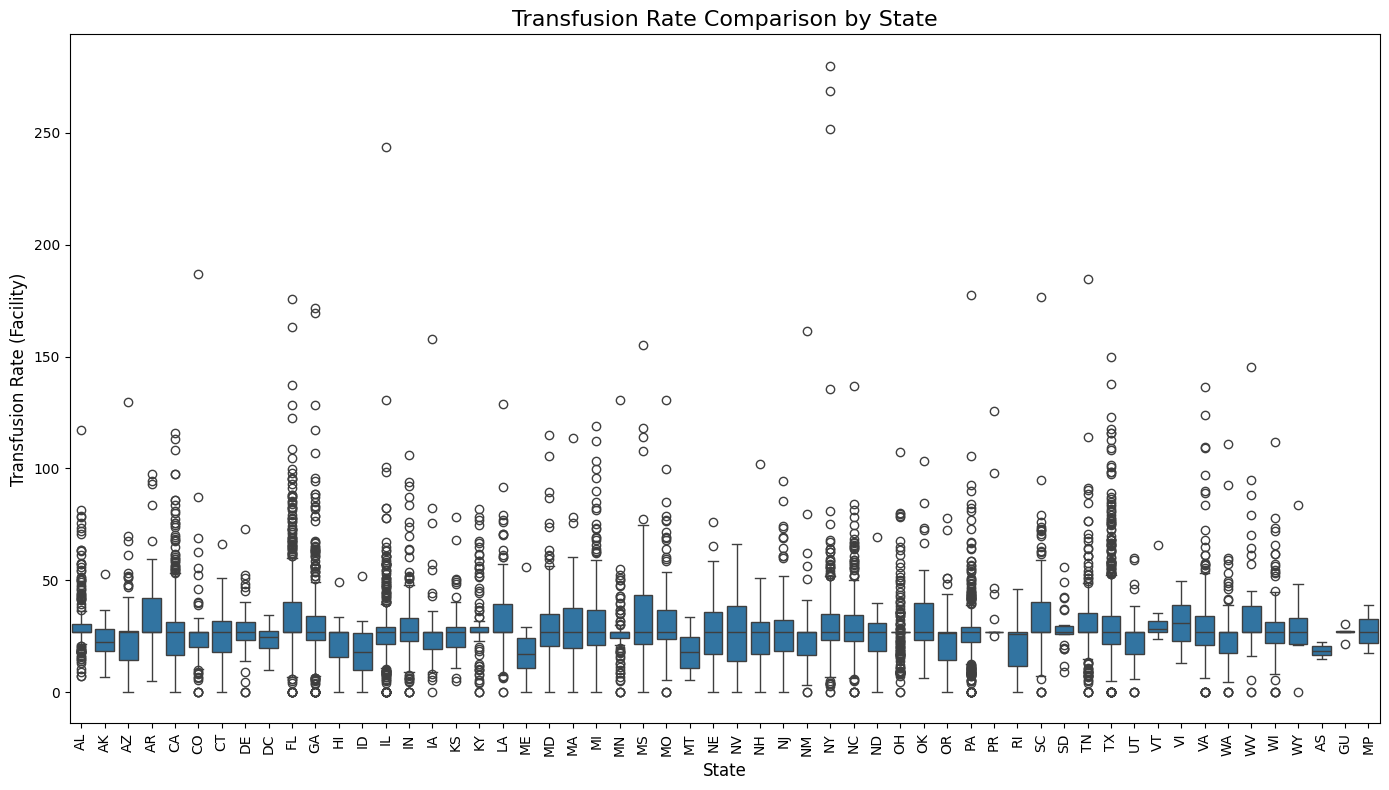

In [28]:
# --- 8. Visualization: Comparative Analysis of Transfusion Rates ---
# This box plot compares the distribution of transfusion rates across different states.
plt.figure(figsize=(14, 8))
sns.boxplot(x='State', y='Transfusion Rate (Facility)', data=df)
plt.title('Transfusion Rate Comparison by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Transfusion Rate (Facility)', fontsize=12)
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.tight_layout()
plt.show()